In [1]:
import datetime
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import config
import math
import scipy.stats as st
import statsmodels.api as sm

In [2]:
start_date = "2021-12-22"
# end_date = "2021-12-30"
end_date = "2022-10-13"

dates = pd.date_range(start_date, end_date).strftime("%Y-%m-%d").to_list()


In [3]:
swap = pd.DataFrame()

vola = pd.DataFrame()
vola['date'] = dates
vola.index = dates

df_daym = pd.DataFrame()
df_daym['minute'] = range(0,60*24)

In [4]:
mint = pd.DataFrame()
burn = pd.DataFrame()
last = pd.DataFrame()

In [5]:
# Get data
for i in range(1, len(dates)):
    # update last date close info
    date = dates[i]
    print(date)
    
    # get daily dataset
    try:
        data_path = "data_processed/" + date + ".csv"
        data = pd.read_csv(data_path, sep=',', index_col=None, dtype=object, header=0)
    except:
        continue
    data[['amount0','amount1','current_tick',"tick_lower","tick_upper",'current_liquidity']] = data[['amount0','amount1','current_tick',"tick_lower","tick_upper",'current_liquidity']].astype(float)
    data[['current_tick']] = data[['current_tick']].astype('Int64')
    data.loc[:, "block_timestamp"] = data.loc[:, "block_timestamp"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
    data['date'] = date
    
    df_mint = data.loc[data['tx_type'].str.contains('MINT')]
    df_burn = data.loc[data['tx_type'].str.contains('BURN')]    
    
    if i == 1:
        data_path = "data_processed/" + dates[0] + ".csv"
        last_data = pd.read_csv(data_path, sep=',', index_col=None, dtype=object, header=0)
        last_data[['current_tick','current_liquidity']] = last_data[['current_tick','current_liquidity']].astype(float)
        last_data[['current_tick']] = last_data[['current_tick']].astype('Int64')
        last_date_end = last_data.iloc[len(last_data) - 1,[10,11,12]].to_frame().T
        date_end = data.iloc[len(data)-1,[10,11,12]].to_frame().T
        last = pd.concat([last, last_date_end])
        last = pd.concat([last, date_end])
    else:
        date_end = data.iloc[len(data) - 1, [10,11,12]].to_frame().T
        # fill in missing data in mint & burn
        for i in range(0, len(df_mint) - 1):
            if pd.isnull(df_mint.iloc[i,10]):
                df_mint.iloc[i, [10,11,12]] = last_date_end.iloc[0, :]
            else:
                break
                
        for i in range(0, len(df_burn) - 1):
            if pd.isnull(df_burn.iloc[i,10]):
                df_burn.iloc[i, [10,11,12]] = last_date_end.iloc[0, :]
            else:
                break
        last = pd.concat([last, date_end])
        last_date_end = date_end
    
    # compute volumn
    df_swap = data.loc[data['tx_type'].str.contains('SWAP'), ['block_timestamp', 'amount0','current_tick','current_liquidity','date']]
    d0 = datetime.datetime.strptime(date+' 0:00:0', "%Y-%m-%d %H:%M:%S")
    df_swap['amount0'] = df_swap['amount0'] / (10**(config.decimal0))
    df_swap['vol'] = df_swap['amount0'].apply(lambda x: abs(x))                      
    df_swap['minute'] = df_swap['block_timestamp'].apply(lambda x: ((x - d0).seconds//60))
                                              
    # compute daily historical volatility
    swap1 = df_swap.loc[:,['minute','current_tick']]
    swap1 = swap1.drop_duplicates(['minute'], keep='last')
    swap1 = pd.merge(df_daym, swap1, how='left',left_on='minute', right_on='minute')
                                              
    if pd.isnull(swap1.iloc[0,1]): # have no transaction at 0:00 
        swap1.iloc[0,1] = last_date_end.iloc[0,2]
    swap1.fillna(method='ffill', inplace=True) # have no transaction at other time points
    
    df = pd.DataFrame({'minute':[-1],
                       'current_tick':[last_date_end.iloc[0,2]]},index=[-1])
    swap1 = pd.concat([df,swap1]) 
    swap1['current_price'] = swap1['current_tick'].map(config.fun)
    swap1['vola'] = swap1['current_price'].pct_change(1).fillna(0)
    swap1 = swap1.drop(-1)
    vola.loc[date, 'vola'] = np.std(swap1['vola'])

    mint = pd.concat([mint, df_mint])
    burn = pd.concat([burn, df_burn])
    swap = pd.concat([swap, df_swap])

2021-12-23
2021-12-24
2021-12-25
2021-12-26
2021-12-27
2021-12-28
2021-12-29
2021-12-30
2021-12-31
2022-01-01


C:\Users\Adriana\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


2022-01-02
2022-01-03
2022-01-04
2022-01-05
2022-01-06
2022-01-07
2022-01-08
2022-01-09
2022-01-10
2022-01-11
2022-01-12
2022-01-13
2022-01-14
2022-01-15
2022-01-16
2022-01-17
2022-01-18
2022-01-19
2022-01-20
2022-01-21
2022-01-22
2022-01-23
2022-01-24
2022-01-25
2022-01-26
2022-01-27
2022-01-28
2022-01-29
2022-01-30
2022-01-31
2022-02-01
2022-02-02
2022-02-03
2022-02-04
2022-02-05
2022-02-06
2022-02-07
2022-02-08
2022-02-09
2022-02-10
2022-02-11
2022-02-12
2022-02-13
2022-02-14
2022-02-15
2022-02-16
2022-02-17
2022-02-18
2022-02-19
2022-02-20
2022-02-21
2022-02-22
2022-02-23
2022-02-24
2022-02-25
2022-02-26
2022-02-27
2022-02-28
2022-03-01
2022-03-02
2022-03-03
2022-03-04
2022-03-05
2022-03-06
2022-03-07
2022-03-08
2022-03-09
2022-03-10
2022-03-11
2022-03-12
2022-03-13
2022-03-14
2022-03-15
2022-03-16
2022-03-17
2022-03-18
2022-03-19
2022-03-20
2022-03-21
2022-03-22
2022-03-23
2022-03-24
2022-03-25
2022-03-26
2022-03-27
2022-03-28
2022-03-29
2022-03-30
2022-03-31
2022-04-01
2022-04-02

vola: 每日的分钟级波动率
volumn usdc： 计价的每日交易量
fee： 万五的手续费收入

In [6]:
vola = vola.drop(start_date)
vola['avg5'] = vola['vola'].rolling(5, min_periods=1).sum()
vola['volumn'] = swap.groupby('date')['vol'].sum()
vola['fee'] = vola['volumn']*0.0005
vola

,date,vola,avg5,volumn,fee
2021-12-23,2021-12-23,0.000855,0.000855,8.683135e+06,4341.567421
2021-12-24,2021-12-24,0.000699,0.001554,1.282215e+07,6411.074803
2021-12-25,2021-12-25,0.000483,0.002037,1.378272e+07,6891.361774
2021-12-26,2021-12-26,0.000407,0.002444,2.452189e+07,12260.945525
2021-12-27,2021-12-27,0.000381,0.002825,1.940119e+07,9700.593524
...,...,...,...,...,...
2022-10-09,2022-10-09,0.000314,0.002447,7.990295e+06,3995.147454
2022-10-10,2022-10-10,0.000815,0.002789,2.007366e+07,10036.827858
2022-10-11,2022-10-11,0.000541,0.002725,2.149142e+07,10745.710459
2022-10-12,2022-10-12,0.000533,0.002629,1.929298e+07,9646.488371


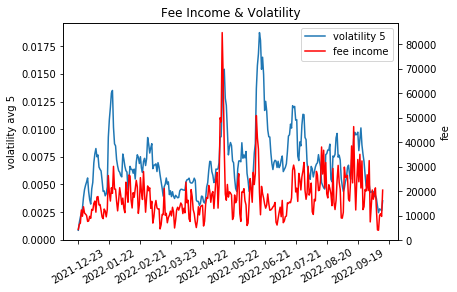

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

ln1 = ax.plot(vola['avg5'])
ax.set_ylabel('volatility avg 5')
plt.xticks(rotation=30)

ax2 = ax.twinx()
ln2 = ax2.plot(vola['fee'],'r')
ax2.set_ylabel('fee')

lns = ln1 + ln2
# labs = [l.get_label() for l in lns]
labs = ['volatility 5','fee income']
ax.legend(lns, labs, loc=0)

ax0 = plt.gca()
ax0.xaxis.set_major_locator(ticker.MultipleLocator(30))
plt.title('Fee Income & Volatility')
plt.show()

手续费与波动率有很强相关性

In [37]:
mint[[ "position_id"]] = \
    mint[["position_id"]].astype(object)

mint[["tick_lower","tick_upper", "position_id"]] = \
    mint[["tick_lower","tick_upper", "position_id"]].astype('Int64')

mint = mint.reset_index()
del mint['index']
mint['current_price'] = mint['current_tick'].map(config.fun)
mint['price_lower'] = mint['tick_upper'].map(config.fun)
mint['price_upper'] = mint['tick_lower'].map(config.fun)
mint['liquidity'] = mint.apply(lambda x: config.get_liquidity(x['current_tick'], x['tick_lower'], x['tick_upper'],
                                                              x['amount0'], x['amount1'],), axis=1)
mint["mean_ratio"] = mint.apply(lambda x: config.compute_mean_ratio(x), axis=1)
mint["log_lq"] = mint["liquidity"].apply(lambda x: math.log((x+1),10))
mint.dtypes

block_number                 object
transaction_hash             object
block_timestamp      datetime64[ns]
pool_tx_index                object
pool_log_index               object
tx_type                      object
sender                       object
receipt                      object
amount0                     float64
amount1                     float64
sqrtPriceX96                 object
current_liquidity           float64
current_tick                  Int64
tick_lower                    Int64
tick_upper                    Int64
delta_liquidity              object
position_id                   Int64
date                         object
current_price               float64
price_lower                 float64
price_upper                 float64
liquidity                   float64
mean_ratio                  float64
log_lq                      float64
label_size                    int64
dtype: object

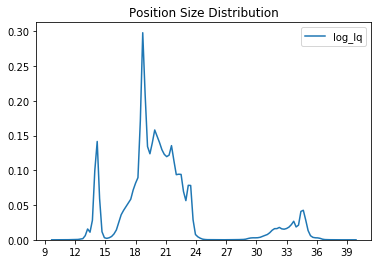

In [22]:
sns.kdeplot(mint["log_lq"])
plt.title("Position Size Distribution")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.show()

LP头寸可以通过Liquidity大小分为三组：
小于10^15：小额投资人
10^15~10^27：普通投资人
大于10^27：专业投资人

我们将分组看三种不同投资人，在创建LP头寸时对上下界的设置有什么特征。以此来探究其动机和目的。

In [23]:
mint['label_size'] = mint['log_lq'].map(config.fun_size)
mint.dtypes

block_number                 object
transaction_hash             object
block_timestamp      datetime64[ns]
pool_tx_index                object
pool_log_index               object
tx_type                      object
sender                       object
receipt                      object
amount0                     float64
amount1                     float64
sqrtPriceX96                 object
current_liquidity           float64
current_tick                  Int64
tick_lower                    Int64
tick_upper                    Int64
delta_liquidity              object
position_id                   Int64
date                         object
current_price               float64
price_lower                 float64
price_upper                 float64
liquidity                   float64
mean_ratio                  float64
log_lq                      float64
label_size                    int64
dtype: object

In [24]:
print(mint.loc[:,['price_upper','price_lower']].quantile([0,.005,.995,1]))
idx = mint[(mint.price_upper>7003) | 
           (mint.price_upper<919) | 
           (mint.price_lower>3886) | 
           (mint.price_lower<112)].index.values
mint98 = mint.drop(idx)
print(mint98.loc[:,['price_upper','price_lower']].quantile([0,1]))

        price_upper   price_lower
0.000  1.574569e-08  2.939545e-27
0.005  9.197128e+02  1.123762e+02
0.995  7.002062e+03  3.885432e+03
1.000  3.401887e+50  1.526348e+15
     price_upper  price_lower
0.0   919.712799   122.139324
1.0  7002.061981  3885.431797


上下界存在异常值，出现2.939545e-27， 3.401887e+50的极端值。
从分位数来看我们可以保留98%~99%的数据，并清除极端值。
极端值可能是用户随意设置的。

Text(0.5, 1.0, 'Price Lower Density')

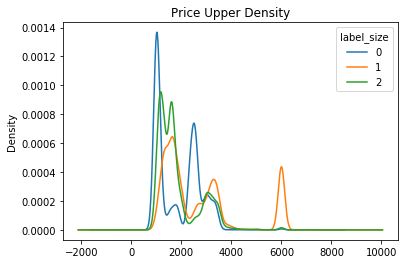

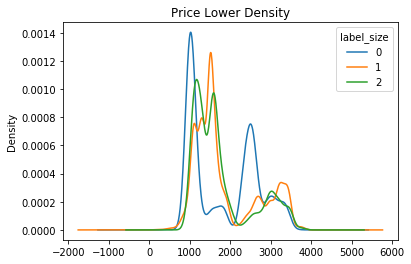

In [26]:
mint_up_size = mint98.pivot(columns='label_size', values='price_upper')
mint_low_size = mint98.pivot(columns='label_size', values='price_lower')

mint_up_size.plot.density()
plt.title('Price Upper Density')

mint_low_size.plot.density()
plt.title('Price Lower Density')

可能有一部分普通投资人使用uniswap前端进行投资，在设置的时候选择6000这个整数。

In [39]:
burn[[ "position_id"]] = \
    burn[["position_id"]].astype(float)

burn[["position_id"]] = \
    burn[["position_id"]].astype('Int64')


In [82]:
mint_time = mint.loc[:,['transaction_hash','block_timestamp','position_id','label_size']]
print("mint shape", mint_time.shape)
mint_time = mint_time.dropna(axis=0)
print("mint shape, drop posid=na", mint_time.shape)
mint_time = mint_time.drop_duplicates(['position_id'], keep='first')
print("mint shape, unique posid", mint_time.shape)
print()

burn_time = burn.loc[:,['transaction_hash','block_timestamp','position_id']]
print(burn_time.shape)
burn_time = burn_time.dropna(axis=0)
print(burn_time.shape)
burn_time = burn_time.drop_duplicates(['position_id'], keep='last')
print(mint_time.shape)
print()

time = pd.merge(mint_time, burn_time, how='outer', left_on='position_id', right_on='position_id')
print(time.shape, time.dtypes,sep='\n')
time.isna().sum()

mint shape (316467, 4)
mint shape, drop posid=na (263440, 4)
mint shape, unique posid (105773, 4)

(237503, 3)
(149967, 3)
(105773, 4)

(105792, 6)
transaction_hash_x            object
block_timestamp_x     datetime64[ns]
position_id                   object
label_size                   float64
transaction_hash_y            object
block_timestamp_y     datetime64[ns]
dtype: object


transaction_hash_x      19
block_timestamp_x       19
position_id              0
label_size              19
transaction_hash_y    4495
block_timestamp_y     4495
dtype: int64

有近一半数据没有交易id。
19个burn 数据没有 对应mint数据，可能mint早于2021.12.23
4495个头寸在2022.10.13 日时仍然没有销毁。

(101278, 6)


C:\Users\Adriana\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Adriana\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Adriana\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


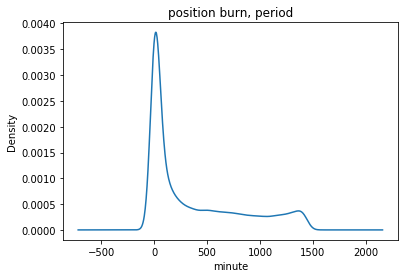

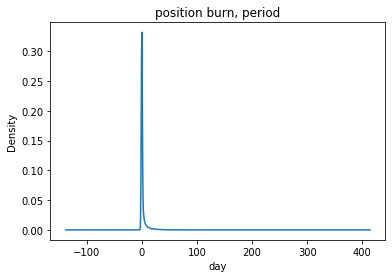

      period_d
0.00       0.0
0.90       5.0
0.95      12.0
0.99      38.0
1.00     276.0


C:\Users\Adriana\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


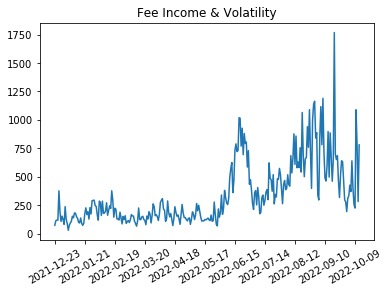

In [68]:
time1 = time.dropna(axis=0)
print(time1.shape)
time1['period'] = (time1['block_timestamp_y'] - time1['block_timestamp_x'])
time1['period_m'] = time1['period'].apply(lambda x: x.seconds/60)
time1['period_d'] = time1['period'].apply(lambda x: x.days)

time1["period_m"].plot.density()
plt.title("position burn, period")
plt.xlabel("minute")
plt.show()

time1["period_d"].plot.density()
plt.title("position burn, period")
plt.xlabel("day")
plt.show()
print(time1.loc[:,['period_d']].quantile([0,.90,.95,.99,1]))
time1['date'] = time1['block_timestamp_x'].apply(lambda x: x.strftime("%Y-%m-%d"))
df1 = time1.groupby('date').count()
df1
plt.plot(df1['position_id'])
plt.xticks(rotation=30)
ax0 = plt.gca()
ax0.xaxis.set_major_locator(ticker.MultipleLocator(29))
plt.title('Fee Income & Volatility')
plt.show()

所有已经销毁的头寸中， 95%的持有时常都小于12天。
在后期仍然有大量头寸mint，mint截止日期应该在容忍范围内尽可能靠后。

因此我们将2022.9.30日设为mint的截止日期，只考虑2021.12.23-2022.9.30之间mint的头寸。对于所有在2022.10.13日还没有burn的头寸，将其按照2022.10.13 23：59的时间归结burn。

(95202, 6)


Text(0.5, 1.0, 'position burn, period, group by size')

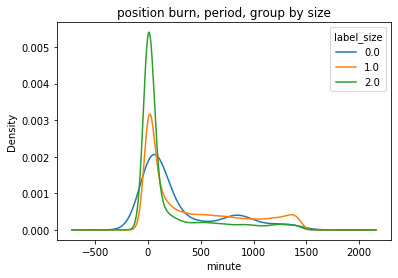

In [76]:
idx = time[time.block_timestamp_x > '2022-10-1'].index.values
time2 = time.drop(idx)
d0 = datetime.datetime(2022,10,13,23,59,59)
time2['block_timestamp_y'] = time2['block_timestamp_y'].fillna(value=d0)
time2 = time2.dropna(axis=0)
print(time2.shape)
time2['period'] = (time2['block_timestamp_y'] - time2['block_timestamp_x'])
time2['period_m'] = time2['period'].apply(lambda x: x.seconds/60)
time2['period_d'] = time2['period'].apply(lambda x: x.days)

time2 = time2.pivot(columns='label_size', values='period_m')
time2.plot.density()
plt.xlabel("minute")
plt.title('position burn, period, group by size')

2021.12.23-2022.9.30内的头寸持有时常
持有资金量越大的投资人，持有时常越短。
所有持有时常基本不超过一天。

In [77]:
mint98['up_percent'] = (mint98['price_upper']/mint98['current_price']) - 1
mint98['low_percent'] = (mint98['price_lower']/mint98['current_price']) - 1
mint98['date'] = mint98['block_timestamp'].apply(lambda x: x.strftime("%Y-%m-%d"))

mint98_day = mint98.loc[:,['date','up_percent','low_percent','price_upper','price_lower']].groupby('date').mean()

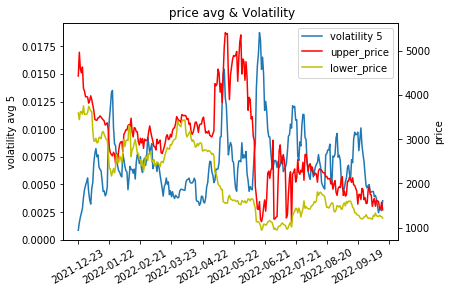

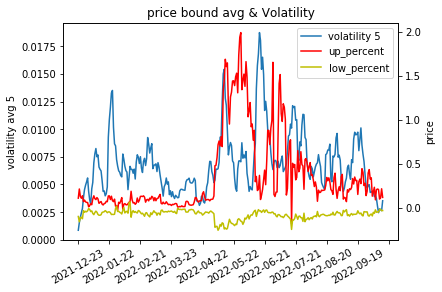

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)

ln1 = ax.plot(vola['avg5'])
ax.set_ylabel('volatility avg 5')
plt.xticks(rotation=30)

ax2 = ax.twinx()
ln2 = ax2.plot(mint98_day['price_upper'],'r')
ln3 = ax2.plot(mint98_day['price_lower'],'y')
ax2.set_ylabel('price')

lns = ln1 + ln2 + ln3
# labs = [l.get_label() for l in lns]
labs = ['volatility 5','upper_price','lower_price']
ax.legend(lns, labs, loc=0)

ax0 = plt.gca()
ax0.xaxis.set_major_locator(ticker.MultipleLocator(30))
plt.title(' price avg & Volatility')
plt.show()





fig = plt.figure()
ax = fig.add_subplot(111)

ln1 = ax.plot(vola['avg5'])
ax.set_ylabel('volatility avg 5')
plt.xticks(rotation=30)

ax2 = ax.twinx()
ln2 = ax2.plot(mint98_day['up_percent'],'r')
ln3 = ax2.plot(mint98_day['low_percent'],'y')
ax2.set_ylabel('price')

lns = ln1 + ln2 + ln3
# labs = [l.get_label() for l in lns]
labs = ['volatility 5','up_percent','low_percent']
ax.legend(lns, labs, loc=0)

ax0 = plt.gca()
ax0.xaxis.set_major_locator(ticker.MultipleLocator(30))
plt.title('price bound avg & Volatility')
plt.show()



In [ ]:
整体上来看，波动率与做市范围正相关。
投资者看涨以太坊，这体现在更高的价格上界

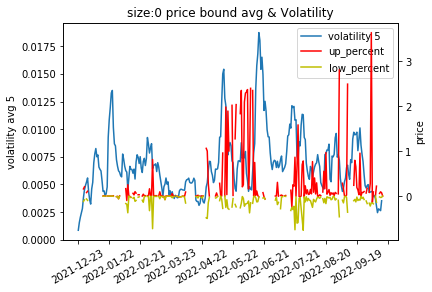

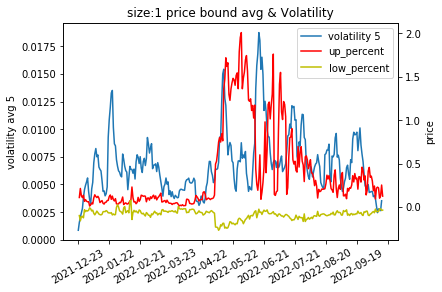

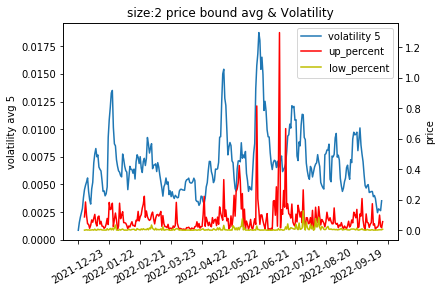

In [83]:
mint98_size = mint98.loc[:,['label_size','date','up_percent','low_percent','price_upper','price_lower']].groupby('label_size')
df_dates = pd.DataFrame({'date':dates})

for n, df in mint98_size:
    df = df.groupby('date').mean()
    df = pd.merge(df_dates, df, how='left', left_on='date',right_index=True)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ln1 = ax.plot(vola['avg5'])
    ax.set_ylabel('volatility avg 5')
    plt.xticks(rotation=30)
    
    ax2 = ax.twinx()
    ln2 = ax2.plot(df['up_percent'],'r')
    ln3 = ax2.plot(df['low_percent'],'y')
    ax2.set_ylabel('price')
    
    lns = ln1 + ln2 + ln3
    # labs = [l.get_label() for l in lns]
    labs = ['volatility 5','up_percent','low_percent']
    ax.legend(lns, labs, loc=0)
    
    ax0 = plt.gca()
    ax0.xaxis.set_major_locator(ticker.MultipleLocator(30))
    plt.title('size:'+str(n)+' price bound avg & Volatility')
    plt.show()

In [ ]:
小额LP只在波动率高的日子出现，有一定滞后性，做市范围较大，lower， upper bound 有一定的对称性。
且早期，小额lp基本没有。小额投资者可能还不太关注这个市场。

中额LP做市范围最大，主要赚取手续费收益。

大额LP：上界与波动率相关性很高，且价格下届往往高于当前价格。